In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import time
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
Smileon_df = pd.read_csv('../data/Smileon_2021_10_17.csv',skiprows=2)
# Smileon_df.head()

C:\Users\Patrick\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,32,36,53,58,59,77,83,89,93,105,127,141,144) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# DELETE ALL THE COLUMNS WE ARE NOT GOING TO USE

In [3]:
cols = [2,8,9,10,11,12,13,14,15,21,22,23,24,26,27,28,29,30,31,32,33,35,37,38,39,40,41,42,43,44,45,46,49,55,57]
Smileon_df.drop(Smileon_df.columns[cols], axis=1, inplace=True)
Smileon_df.head (5)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,CountryName,PostalCode,PhoneType,Narrative,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,OrgNum,SMILE ON 60+ Demographic Information - # of People in Household,Birth Year,SMILE ON 60+ Demographic Information - Other Language,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2393 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2950 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 4342 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7140 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7320 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Maxillary Quantity,SMILE ON 60+ Oral Care Encounter - 7971 - Quantity,SMILE ON 60+ Oral Care Encounter - 7972 - Quantity,SMILE ON 60+ Oral Care Encounter - 9110 - Quantity,SMILE ON 60+ Oral Care Encounter - 9951 - Quantity,SMILE ON 60+ Oral Care Encounter - Lab Assist narrative,SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - No Code - 

## member 2807762 has no data== removed

In [4]:
Smileon_df = Smileon_df.drop(Smileon_df.index[[44358]])


# changing the Smileon_df columns to a list 

In [5]:
Smileon_ls = Smileon_df.columns.tolist()
# Smileon_ls

# create a for- loop to remove the words 'SMILE ON 60+ ' from all columns

In [6]:
new_columns = []
for column in Smileon_ls:
    new_column = column.replace('SMILE ON 60+ ', '')
    new_columns.append(new_column)    
    
# new_columns

In [7]:
Smileon_df.columns = new_columns
# Smileon_df.columns

# Created a Lambda loop to change the columns name from Oral Care Encounter' to 'code' 

In [8]:
Smileon_df.columns = Smileon_df.columns.map(lambda a: str(a).replace('Oral Care Encounter','code'))
Smileon_df.columns.tolist()

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'Demographic Information - # of People in Household',
 'Birth Year',
 'Demographic Information - Other Language',
 'Notes (Optional) - Notes',
 'code - 1351 - Quantity',
 'code - 1354 - Quantity',
 'code - 2140 - Quantity',
 'code - 2150 - Quantity',
 'code - 2160 - Quantity',
 'code - 2161 - Quantity',
 'code - 220 - Quantity',
 'code - 230 - Quantity',
 'code - 2330 - Quantity',
 'code - 2331 - Quantity',
 'code - 2332 - Quantity',
 'code - 2335 - Quantity',
 'code - 2390 - Quantity',
 'code - 2391 - Quantity',
 'code - 2392 - Quantity',
 'code - 2393 - Quantity',
 'code - 2394 -

In [9]:
Smileon_df.columns = Smileon_df.columns.map(lambda a: str(a).replace('Base-line Oral and Conditions Questions','questions'))
Smileon_df.columns.tolist()

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'Demographic Information - # of People in Household',
 'Birth Year',
 'Demographic Information - Other Language',
 'Notes (Optional) - Notes',
 'code - 1351 - Quantity',
 'code - 1354 - Quantity',
 'code - 2140 - Quantity',
 'code - 2150 - Quantity',
 'code - 2160 - Quantity',
 'code - 2161 - Quantity',
 'code - 220 - Quantity',
 'code - 230 - Quantity',
 'code - 2330 - Quantity',
 'code - 2331 - Quantity',
 'code - 2332 - Quantity',
 'code - 2335 - Quantity',
 'code - 2390 - Quantity',
 'code - 2391 - Quantity',
 'code - 2392 - Quantity',
 'code - 2393 - Quantity',
 'code - 2394 -

In [10]:
Smileon_df.columns = Smileon_df.columns.map(lambda a: str(a).replace('Demographic Information', 'demographics'))
Smileon_df['CallDateAndTimeStart'] = pd.to_datetime(Smileon_df['CallDateAndTimeStart'])
Smileon_df['CallDateAndTimeEnd'] = pd.to_datetime(Smileon_df['CallDateAndTimeEnd'])
Smileon_df['EnteredOn'] = pd.to_datetime(Smileon_df['EnteredOn'])
Smileon_df[['EnteredOn', 'CallDateAndTimeStart', 'CallDateAndTimeEnd']].head(2)

,EnteredOn,CallDateAndTimeStart,CallDateAndTimeEnd
0,2021-09-30 16:57:00,2021-09-30 16:56:00,2021-09-30 16:57:00
1,2021-09-30 16:53:00,2021-09-30 16:53:00,2021-09-30 16:53:00


In [11]:
Smileon_df.loc[~Smileon_df['Screening - Last Screening Date'].str.contains('/', na = False), 'Screening - Last Screening Date'].value_counts().head (2)

8.24.2020    6
9.15.2020    5
Name: Screening - Last Screening Date, dtype: int64

In [12]:
Smileon_df['Screening - Last Screening Date'].replace('6022020', '2020-06-02', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('10232020', '2020-10-23', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('8212019', '2019-08-21', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('10312018', '2018-10-31', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('10082019', '2019-10-08', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('11262019', '2019-11-26', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('3152019', '2019-03-15', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('81519', '2019-08-15', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('11002019', '2019-11-01', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('1222020', '2020-12-02', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('8162019', '2019-08-16', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('9252019', '2019-09-25', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('9052019', '2019-09-05', inplace=True)


In [13]:
list= (['CallReportNum','CallerNum', 'ReportVersion', 'CallDateAndTimeStart','CallDateAndTimeEnd', 'CallLength', 'PhoneWorkerNum','CityName', 'CountyName', 'StateProvince',
        'CountryName', 'PostalCode', 'PhoneType', 'Narrative', 'Feedback', 'EnteredByWorkerNum', 'EnteredOn', 'Reviewed', 
        'FeedbackStatus','FeedbackFromPhoneWorkerNum', 'FeedbackFromPhoneWorkerName', 'ReferralsMade'])

intake = Smileon_df[list]
intake.head(5)

,CallReportNum,CallerNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,PhoneWorkerNum,CityName,CountyName,StateProvince,CountryName,PostalCode,PhoneType,Narrative,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade
0,93115324,3638169,SMILE ON 60+ Registration,2021-09-30 16:56:00,2021-09-30 16:57:00,1,123747,Smyrna,Rutherford,TN,United States,37167.0,Mobile,spoke with client again concerning transfer to...,NaN,123747,2021-09-30 16:57:00,No,Not yet,NaN,NaN,NaN
1,93115188,4431194,SMILE ON 60+ Registration,2021-09-30 16:53:00,2021-09-30 16:53:00,0,123747,Nashville,Davidson,TN,United States,37211.0,NaN,Called client to follow up on app. LM for call...,NaN,123747,2021-09-30 16:53:00,No,Not yet,NaN,NaN,NaN
2,93115081,2941341,SMILE ON 60+ Clinical,2021-09-30 16:50:00,2021-09-30 16:51:00,1,161979,Memphis,Shelby,TN,United States,38104.0,NaN,NaN,NaN,161979,2021-09-30 16:51:00,No,Not yet,NaN,NaN,NaN
3,93115032,3823933,SMILE ON 60+ Clinical,2021-09-30 16:48:00,2021-09-30 16:49:00,1,161979,Memphis,Shelby,TN,United States,38109.0,NaN,NaN,NaN,161979,2021-09-30 16:49:00,No,Not yet,NaN,NaN,NaN
4,93114968,3348256,SMILE ON 60+ Clinical,2021-09-30 16:46:00,2021-09-30 16:48:00,2,161979,Memphis,Shelby,TN,United States,NaN,NaN,NaN,NaN,161979,2021-09-30 16:48:00,No,Not yet,NaN,NaN,NaN


In [14]:
codes_list = (['CallReportNum', 'CallerNum','CallDateAndTimeStart','code - 1351 - Quantity', 'code - 1354 - Quantity', 'code - 2140 - Quantity',
 'code - 2150 - Quantity', 'code - 2160 - Quantity', 'code - 2161 - Quantity', 'code - 220 - Quantity', 'code - 230 - Quantity',
 'code - 2330 - Quantity', 'code - 2331 - Quantity', 'code - 2332 - Quantity', 'code - 2335 - Quantity', 'code - 2390 - Quantity',
 'code - 2391 - Quantity', 'code - 2392 - Quantity', 'code - 2393 - Quantity', 'code - 2394 - Quantity', 'code - 2915 - Quantity',
 'code - 2920 - Quantity', 'code - 2933 - Quantity', 'code - 2940 - Quantity', 'code - 2950 - Quantity', 'code - 2954 - Quantity',
 'code - 2955 - Quantity', 'code - 2980 - Quantity', 'code - 3220 - Quantity', 'code - 4341 - Quantity', 'code - 4342 - Quantity',
 'code - 6930 - Quantity', 'code - 6980 - Quantity', 'code - 7111 - Quantity', 'code - 7140 - Quantity', 'code - 7210 - Quantity',
 'code - 7220 - Quantity', 'code - 7230 - Quantity', 'code - 7240 - Quantity', 'code - 7241 - Quantity', 'code - 7250 - Quantity',
 'code - 7261 - Quantity', 'code - 7285 - Quantity', 'code - 7286 - Quantity', 'code - 7310 - Quantity', 'code - 7311 - Quantity',
 'code - 7320 - Quantity', 'code - 7321 - Quantity', 'code - 7410 - Quantity', 'code - 7411 - Quantity', 'code - 7412 - Quantity',
 'code - 7413  - Quantity', 'code - 7414 - Quantity', 'code - 7415 - Quantity', 'code - 7440 - Quantity', 'code - 7450 - Quantity',
 'code - 7451 - Quantity', 'code - 7460 - Quantity', 'code - 7461 - Quantity', 'code - 7471 - Quantity', 'code - 7510 - Quantity',
 'code - 7511 - Quantity', 'code - 7970 - Mandibular Quantity', 'code - 7970 - Maxillary Quantity ', 'code - 7971 - Quantity',
 'code - 7972 - Quantity', 'code - 9110 - Quantity', 'code - 9951 - Quantity', 'code - Lab Assist narrative',
 'code - No Code - Denture Step Mandibular Quantity', 'code - No Code - Denture Step Maxillary Quantity',])

codes= Smileon_df[codes_list]
codes.head(2)

,CallReportNum,CallerNum,CallDateAndTimeStart,code - 1351 - Quantity,code - 1354 - Quantity,code - 2140 - Quantity,code - 2150 - Quantity,code - 2160 - Quantity,code - 2161 - Quantity,code - 220 - Quantity,code - 230 - Quantity,code - 2330 - Quantity,code - 2331 - Quantity,code - 2332 - Quantity,code - 2335 - Quantity,code - 2390 - Quantity,code - 2391 - Quantity,code - 2392 - Quantity,code - 2393 - Quantity,code - 2394 - Quantity,code - 2915 - Quantity,code - 2920 - Quantity,code - 2933 - Quantity,code - 2940 - Quantity,code - 2950 - Quantity,code - 2954 - Quantity,code - 2955 - Quantity,code - 2980 - Quantity,code - 3220 - Quantity,code - 4341 - Quantity,code - 4342 - Quantity,code - 6930 - Quantity,code - 6980 - Quantity,code - 7111 - Quantity,code - 7140 - Quantity,code - 7210 - Quantity,code - 7220 - Quantity,code - 7230 - Quantity,code - 7240 - Quantity,code - 7241 - Quantity,code - 7250 - Quantity,code - 7261 - Quantity,code - 7285 - Quantity,code - 7286 - Quantity,code - 7310 - Quantity,code - 7311 - Quantity,code - 7320 - Quantity,code - 7321 - Quantity,code - 7410 - Quantity,code - 7411 - Quantity,code - 7412 - Quantity,code - 7413 - Quantity,code - 7414 - Quantity,code - 7415 - Quantity,code - 7440 - Quantity,code - 7450 - Quantity,code - 7451 - Quantity,code - 7460 - Quantity,code - 7461 - Quantity,code - 7471 - Quantity,code - 7510 - Quantity,code - 7511 - Quantity,code - 7970 - Mandibular Quantity,code - 7970 - Maxillary Quantity,code - 7971 - Quantity,code - 7972 - Quantity,code - 9110 - Quantity,code - 9951 - Quantity,code - Lab Assist narrative,code - No Code - Denture Step Mandibular Quantity,code - No Code - Denture Step Maxillary Quantity
0,93115324,3638169,2021-09-30 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,4431194,2021-09-30 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
questions_list= (['CallReportNum', 'CallerNum','CallDateAndTimeStart','questions - Are you limited in what you can eat?', 'questions - Dental Clinic', 'questions - Did the client commit to referral?',
 'questions - Did you help in these other areas?', 'questions - Do you need help in these other areas?',
 'questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?',
 'questions - How would you describe the condition of your mouth and teeth?', 'questions - What is the next step for client encounter?',
 'questions - What is the next step for clients encounter?', 'Case Management Information - Dental Clinic',
 'Case Management Information - Transportation Barriers', 'Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)',
 'Case Management Information - What is the outcome for the client?'])
questions = Smileon_df.filter(items= questions_list)
questions.head()

,CallReportNum,CallerNum,CallDateAndTimeStart,questions - Are you limited in what you can eat?,questions - Dental Clinic,questions - Did the client commit to referral?,questions - Did you help in these other areas?,questions - Do you need help in these other areas?,questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,questions - How would you describe the condition of your mouth and teeth?,questions - What is the next step for client encounter?,questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,Case Management Information - Transportation Barriers,Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),Case Management Information - What is the outcome for the client?
0,93115324,3638169,2021-09-30 16:56:00,Yes,Interfaith Dental Clinic - Murfreesboro,Yes,NaN,No,Yes,Poor,NaN,Referred to dental clinic,NaN,NaN,No insurance,NaN
1,93115188,4431194,2021-09-30 16:53:00,Yes,Interfaith Dental Clinic - Nashville,Yes,NaN,No,Yes,Poor,NaN,Referred to dental clinic,NaN,NaN,Dental cost; No insurance,NaN
2,93115081,2941341,2021-09-30 16:50:00,No,Christ Community Health Services- Broad Avenue,Yes,NaN,NaN,No,Good,Referred to dental clinic,NaN,NaN,NaN,Dental cost; No insurance,NaN
3,93115032,3823933,2021-09-30 16:48:00,Yes,NaN,Yes,NaN,NaN,Yes,Fair,NaN,NaN,NaN,NaN,Dental cost; No insurance; Fear,NaN
4,93114968,3348256,2021-09-30 16:46:00,Yes,NaN,Yes,NaN,NaN,Yes,Poor,NaN,NaN,NaN,Availability - no car/access to transportation,Transportation; Dental cost; No insurance,NaN


In [16]:
demographic_ls=  (['CallReportNum', 'CallerNum','CallDateAndTimeStart','Birth Year','demographics - # of People in Household', 
 'demographics - Other Language', 'Notes (Optional) - Notes','demographics - Gender', 'demographics - Household Income Level',
 'demographics - How did you first hear about the program?', 'demographics - Preferred Language/Language Needed',
 'demographics - Race/Ethnicity', 'demographics - What other assistance programs are you on?',
 'demographics - When is the last time you visited your dentist?'])

demographic= Smileon_df.filter(items= demographic_ls)
demographic.head()

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years


In [17]:
type(demographic['Birth Year'][1])

int

In [18]:
eligib_list= (['CallReportNum', 'CallerNum','CallDateAndTimeStart','Verification of Eligibility - Verification Date',
              'Presumptive Eligibility - Dental Insurance?', 'Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?',
 'Presumptive Eligibility - What is the next step for clients encounter? ', 'Presumptive Eligibility - What is the next step for clients encounter?','Verification of Eligibility - Transportation Arranged',
 'Verification of Eligibility - Verification of Eligibility'])

eligibility= Smileon_df.filter(items= eligib_list)
eligibility.head()

,CallReportNum,CallerNum,CallDateAndTimeStart,Verification of Eligibility - Verification Date,Presumptive Eligibility - Dental Insurance?,Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?,Presumptive Eligibility - What is the next step for clients encounter?,Presumptive Eligibility - What is the next step for clients encounter?,Verification of Eligibility - Transportation Arranged,Verification of Eligibility - Verification of Eligibility
0,93115324,3638169,2021-09-30 16:56:00,NaN,No,Yes,Continued with Navigation,NaN,NaN,NaN
1,93115188,4431194,2021-09-30 16:53:00,NaN,No,Yes,Continued with Navigation,NaN,NaN,NaN
2,93115081,2941341,2021-09-30 16:50:00,10/8/2019,No,Yes,NaN,Continued with Navigation,NaN,NaN
3,93115032,3823933,2021-09-30 16:48:00,11/10/2020,No,Yes,NaN,Continued with Navigation,NaN,NaN
4,93114968,3348256,2021-09-30 16:46:00,4/15/2020,No,Yes,NaN,Continued with Navigation,NaN,NaN


In [19]:
outcomes_list =(['CallReportNum', 'CallerNum','CallDateAndTimeStart','Treatment Plan - Action: Upload After Picture on Finish Tab',
 'Treatment Plan - Is the treatment plan completed?','Treatment Plan - Was a treatment plan developed?',
 'Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)',
                 'code - Action: Upload After Picture on Finish Tab', 'code - Is the treatment plan completed?',
 'code - Was a treatment plan developed?', 'code - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)',
 'code - What care was provided to the enrollee? (Select all that apply)'])

outcomes= Smileon_df.filter(items= outcomes_list)
outcomes.head()

,CallReportNum,CallerNum,CallDateAndTimeStart,Treatment Plan - Action: Upload After Picture on Finish Tab,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",code - Action: Upload After Picture on Finish Tab,code - Is the treatment plan completed?,code - Was a treatment plan developed?,"code - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",code - What care was provided to the enrollee? (Select all that apply)
0,93115324,3638169,2021-09-30 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,4431194,2021-09-30 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,2941341,2021-09-30 16:50:00,NaN,No,Yes,No,NaN,NaN,NaN,NaN,274 - Bitewings - four films - 5; 1110 - Proph...
3,93115032,3823933,2021-09-30 16:48:00,NaN,No,Yes,No,NaN,NaN,NaN,NaN,2391 - Posterior one surface resin - 15; 2392...
4,93114968,3348256,2021-09-30 16:46:00,NaN,No,Yes,No,NaN,NaN,NaN,NaN,No Code - Denture step Mandibular: may be used...


In [20]:
screening_info_list =(['CallReportNum', 'CallerNum','CallDateAndTimeStart','Screening - # of Lower Natural Teeth',
 'Screening - # of Upper Natural Teeth', 'Screening - Do you have removable dentures?', 'Screening - Do you usually wear your denture(s) when you eat?',
 'Screening - Experienced any problems related to mouth/teeth during past 12 months?', 'Screening - How often do you brush your teeth?',
 'Screening - Need for Periodontal Care', 'Screening - Root Fragments', 'Screening - Suspicious Soft Tissue Lesions',
 'Screening - Treatment Urgency', 'Screening - Untreated Decay', 'Site Information - Enroller ID',
 'Site Information - Enroller Location','Clinic Information - Action: Upload Before Picture on Finish Tab',
 'Clinic Information - Is patient of record date if yes last seen?', 'Clinic Information - Was initial appointment made?',
 'Clinic Information - Was initial transportation assistance or referral provided?','Screening - Last Screening Date'])

screening_info= Smileon_df.filter(items= screening_info_list)
screening_info.head()

,CallReportNum,CallerNum,CallDateAndTimeStart,Screening - # of Lower Natural Teeth,Screening - # of Upper Natural Teeth,Screening - Do you have removable dentures?,Screening - Do you usually wear your denture(s) when you eat?,Screening - Experienced any problems related to mouth/teeth during past 12 months?,Screening - How often do you brush your teeth?,Screening - Need for Periodontal Care,Screening - Root Fragments,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,Screening - Last Screening Date
0,93115324,3638169,2021-09-30 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,4431194,2021-09-30 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN
2,93115081,2941341,2021-09-30 16:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,10/8/2019
3,93115032,3823933,2021-09-30 16:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,11/10/2020
4,93114968,3348256,2021-09-30 16:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,9/10/2021


In [21]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,2385621,2018-08-01 08:00:00,1957,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,67251452,2631417,2018-05-31 08:27:00,1958,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57857,53192452,-1,2018-05-23 14:11:00,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,67915561,3239813,2018-05-15 09:06:00,1958,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [22]:
demographic['Birth Year'][17417]

'#NUM!'

In [23]:
demographic.loc[demographic['Birth Year']=='#NUM!']

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
17417,81177698,3846951,2020-11-20 09:19:00,#NUM!,1,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
52334,59916549,2591513,2019-01-31 09:33:00,#NUM!,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months


In [24]:
demographic.loc[demographic['CallerNum']==3846951]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
2788,91142758,3846951,2021-08-10 11:45:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
5294,89633836,3846951,2021-06-29 11:33:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
12122,85520508,3846951,2021-03-10 16:01:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
17417,81177698,3846951,2020-11-20 09:19:00,#NUM!,1,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years


In [25]:
demographic.loc[demographic['CallerNum']==2591513]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
8015,88119096,2591513,2021-05-18 08:17:00,1949,2.0,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
12578,85490840,2591513,2021-03-03 07:34:00,1949,2.0,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
52224,60201827,2591513,2019-02-04 14:18:00,1949,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
52334,59916549,2591513,2019-01-31 09:33:00,#NUM!,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months


In [26]:
demographic['Birth Year'][52334]= 1949
demographic['Birth Year'][52334]

<ipython-input-26-5b2c4757d9b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][52334]= 1949


1949

In [27]:
demographic['Birth Year'][17417]=1960
demographic['Birth Year'][17417]

<ipython-input-27-afea82bd6957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][17417]=1960


1960

In [28]:
demographic.loc[demographic['CallerNum']==2591513]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
8015,88119096,2591513,2021-05-18 08:17:00,1949,2.0,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
12578,85490840,2591513,2021-03-03 07:34:00,1949,2.0,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
52224,60201827,2591513,2019-02-04 14:18:00,1949,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
52334,59916549,2591513,2019-01-31 09:33:00,1949,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months


In [29]:
for year in demographic['Birth Year']:
    print(type(year))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

In [30]:
demographic.loc[demographic['Birth Year']=='#VALUE!']

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
46730,64187244,2790105,2019-06-03 09:04:00,#VALUE!,1,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,NaN,3 to 5 years
47713,62832249,2714759,2019-05-10 14:39:00,#VALUE!,1,NaN,NaN,Female,NaN,Dental Clinic Staff,English,Caucasian,SSI/SSDI,1 to 2 years


In [31]:
demographic.loc[demographic['CallerNum']==2807762]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?


In [32]:
demographic['Birth Year'][46730] = 1955
demographic['Birth Year'][46730]

<ipython-input-32-4f44ea14d209>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][46730] = 1955


1955

In [33]:
demographic['Birth Year'][47713]= 1956
demographic['Birth Year'][47713]

<ipython-input-33-162fcb5f9d27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][47713]= 1956


1956

In [34]:
demographic['Birth Year']= demographic['Birth Year'].astype (int)

In [35]:
demographic['Birth Year'][11371] = 1956
demographic['Birth Year'][30679] = 1959
demographic['Birth Year'][25632] = 1941
demographic['Birth Year'][9660] = 1961
demographic['Birth Year'][22663] = 1953
demographic['Birth Year'][19254] = 1956
demographic['Birth Year'][18845] = 1944
demographic['Birth Year'][18615] = 1955
demographic['Birth Year'][13202] = 1958
demographic['Birth Year'][9780] = 1961
demographic['Birth Year'][57354]= 1944
demographic['Birth Year'][53251]= 1958
demographic['Birth Year'][38698] = 1938


<ipython-input-35-e4ea2cc12d36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][11371] = 1956
<ipython-input-35-e4ea2cc12d36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][30679] = 1959
<ipython-input-35-e4ea2cc12d36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][25632] = 1941
<ipython-input-35-e4ea2cc12d36>:4: SettingWithCopyWarning: 
A value is tryin

In [36]:
age= []
now= pd.Timestamp.now().year

for year in demographic['Birth Year']:
    #print(type(year))
    #print(type (now))
    diff = now-year
    age.append(diff)
    
age

[61,
 62,
 79,
 61,
 66,
 63,
 73,
 79,
 60,
 62,
 76,
 66,
 73,
 63,
 65,
 68,
 68,
 73,
 73,
 62,
 63,
 68,
 86,
 61,
 61,
 66,
 78,
 62,
 66,
 76,
 60,
 76,
 65,
 68,
 69,
 61,
 71,
 79,
 67,
 61,
 71,
 70,
 65,
 64,
 63,
 80,
 76,
 76,
 66,
 65,
 61,
 66,
 65,
 61,
 74,
 77,
 63,
 61,
 70,
 61,
 70,
 65,
 65,
 63,
 61,
 73,
 65,
 84,
 69,
 84,
 63,
 0,
 65,
 61,
 0,
 61,
 65,
 64,
 64,
 63,
 83,
 66,
 72,
 66,
 61,
 61,
 74,
 79,
 61,
 80,
 63,
 84,
 64,
 74,
 66,
 64,
 84,
 84,
 76,
 72,
 63,
 77,
 61,
 81,
 62,
 73,
 67,
 63,
 69,
 63,
 73,
 61,
 62,
 72,
 63,
 62,
 71,
 64,
 65,
 62,
 65,
 72,
 61,
 83,
 64,
 64,
 60,
 62,
 60,
 63,
 69,
 74,
 68,
 65,
 63,
 84,
 84,
 67,
 73,
 70,
 75,
 63,
 64,
 60,
 70,
 65,
 64,
 66,
 64,
 61,
 73,
 73,
 62,
 75,
 63,
 63,
 68,
 65,
 66,
 66,
 66,
 75,
 75,
 68,
 71,
 66,
 70,
 76,
 61,
 62,
 70,
 75,
 62,
 62,
 70,
 70,
 71,
 78,
 78,
 63,
 63,
 64,
 61,
 73,
 67,
 63,
 80,
 62,
 65,
 75,
 65,
 67,
 62,
 62,
 65,
 60,
 63,
 60,
 65,
 79,
 6

In [37]:
demographic.insert(4,'Age',age)

In [38]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,79,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,61,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,66,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,2385621,2018-08-01 08:00:00,1957,64,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,67251452,2631417,2018-05-31 08:27:00,1958,63,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57857,53192452,-1,2018-05-23 14:11:00,1900,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,67915561,3239813,2018-05-15 09:06:00,1958,63,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [39]:
demographic= demographic.loc[demographic['CallerNum']!=-2]

In [40]:
demographic= demographic.loc[demographic['CallerNum']!=-1]

In [41]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,79,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,61,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,66,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57854,55104302,2384744,2018-08-01 08:18:00,1954,67,1,NaN,NaN,Female,$21246-$24280,This encounter,NaN,Caucasian,NaN,Less than 12 months
57855,55627514,2385621,2018-08-01 08:00:00,1957,64,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,67251452,2631417,2018-05-31 08:27:00,1958,63,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57858,67915561,3239813,2018-05-15 09:06:00,1958,63,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [42]:
demographic['demographics - Gender'].value_counts()

Female         35850
Male           21459
Transgender       21
Other              1
Name: demographics - Gender, dtype: int64

In [43]:
demographic['demographics - How did you first hear about the program?'].value_counts()

Dental Clinic Staff                      33295
Other                                     9780
This encounter                            3015
Wisdom Tooth Project Presentation         2160
Senior Center                             2050
SMILE ON CDHC                             1678
TV                                        1470
Flyer                                      786
Newspaper                                  297
Dental Hotline                             259
SHIP Navigator                             129
Health Assist                               68
Radio                                       60
Tennessee Alliance for Legal Services        4
Habitat for Humanity Greater Memphis         2
Name: demographics - How did you first hear about the program?, dtype: int64

In [44]:
demographic['demographics - Race/Ethnicity'].value_counts()

Caucasian                            32243
African American                     14668
Hispanic                              2656
Asian                                  836
Unknown                                833
American Indian and Alaska Native      170
Multi-racial                           147
Pacific Islander                        37
Name: demographics - Race/Ethnicity, dtype: int64

In [45]:
demographic['demographics - What other assistance programs are you on?'].value_counts()

SSI/SSDI                               12195
SNAP                                    3967
TennCare                                2061
SNAP; TennCare                          1805
SNAP; SSI/SSDI                          1792
SNAP; TennCare; SSI/SSDI                1657
TennCare; SSI/SSDI                      1443
Section 8                                920
SNAP; Section 8                          615
SNAP; TennCare; Section 8; SSI/SSDI      523
SNAP; TennCare; Section 8                483
Section 8; SSI/SSDI                      443
SNAP; Section 8; SSI/SSDI                255
TennCare; Section 8; SSI/SSDI            227
TennCare; Section 8                      217
Name: demographics - What other assistance programs are you on?, dtype: int64

In [46]:
demographic['Birth Year'][11371] = 1956
demographic['Birth Year'][11371]


1956

In [52]:
under60 = demographic.loc[demographic['Age'] < 60]


,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
71,93314524,4569681,2021-09-30 08:30:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,Less than 12 months
74,93314197,4569681,2021-09-30 08:21:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,African American,NaN,Less than 12 months
1143,92287081,4507376,2021-09-09 11:13:00,1965,56,2.0,NaN,NaN,Female,$28806-$32920,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3987,90430253,4399605,2021-07-21 14:49:00,1967,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14340,83736245,4005782,2021-01-27 11:31:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,SMILE ON CDHC,English,African American,SNAP; SSI/SSDI,More than 5 years
19567,79732107,3757361,2020-10-12 10:39:00,1963,58,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,3 to 5 years
21784,78140295,3664928,2020-08-31 14:53:00,1963,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21985,77995875,3656796,2020-08-27 10:35:00,1968,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26447,74321243,2698280,2020-05-20 14:20:00,1964,57,1,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,TennCare; SSI/SSDI,Less than 12 months
27525,72344336,3295298,2020-03-30 13:00:00,1962,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
demographic.loc[demographic['CallerNum'] ==3172525]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,Age Category
2274,91461695,3172525,2021-08-18 12:43:00,1959,62,2.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
9846,87049087,3172525,2021-04-19 12:25:00,1959,62,2.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
17187,81360780,3172525,2020-11-25 09:35:00,1959,62,2,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
18582,80361989,3172525,2020-10-29 15:44:00,1959,62,2,NaN,Used code 5284 for the mandibular not a code w...,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
19089,79994154,3172525,2020-10-20 13:30:00,1959,62,2,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
21193,78503695,3172525,2020-09-10 15:31:00,1959,62,2,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
22311,77766673,3172525,2020-08-20 15:38:00,1959,62,2,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
22695,77498868,3172525,2020-08-13 15:41:00,1959,62,2,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
24726,75951637,3172525,2020-06-30 14:08:00,1959,62,2,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
29714,71017788,3172525,2020-02-20 12:20:00,1959,62,2,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64


In [190]:
demographic['Birth Year'][30679] = 1959

<ipython-input-190-c3965c1d7fbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][30679] = 1959


In [191]:
demographic.loc[demographic['CallerNum'] ==2635910]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,Age Category
1255,92554323,2635910,2021-09-08 09:22:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
2223,91771225,2635910,2021-08-18 15:59:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
3815,90728918,2635910,2021-07-23 16:24:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
8071,88461294,2635910,2021-05-17 11:09:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
10815,86789210,2635910,2021-04-01 11:30:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
12498,85739172,2635910,2021-03-04 10:06:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
16328,82879981,2635910,2020-12-14 13:47:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
22760,77460274,2635910,2020-08-12 15:45:00,1941,80,1,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
23042,77748297,2635910,2020-08-06 09:05:00,1941,80,1,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
24894,75809758,2635910,2020-06-26 08:03:00,1941,80,1,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84


In [192]:
demographic['Birth Year'][25632] = 1941

<ipython-input-192-b4fd45a6a525>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][25632] = 1941


In [193]:
demographic.loc[demographic['CallerNum'] ==2635910]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,Age Category
1255,92554323,2635910,2021-09-08 09:22:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
2223,91771225,2635910,2021-08-18 15:59:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
3815,90728918,2635910,2021-07-23 16:24:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
8071,88461294,2635910,2021-05-17 11:09:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
10815,86789210,2635910,2021-04-01 11:30:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
12498,85739172,2635910,2021-03-04 10:06:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
16328,82879981,2635910,2020-12-14 13:47:00,1941,80,1.0,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
22760,77460274,2635910,2020-08-12 15:45:00,1941,80,1,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
23042,77748297,2635910,2020-08-06 09:05:00,1941,80,1,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84
24894,75809758,2635910,2020-06-26 08:03:00,1941,80,1,NaN,NaN,Female,$21246-$24280,Wisdom Tooth Project Presentation,NaN,Caucasian,SSI/SSDI,Less than 12 months,80-84


In [194]:
demographic.loc[demographic['Age'] < 50]


,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,Age Category
71,93314524,4569681,2021-09-30 08:30:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,Less than 12 months,Under 60
74,93314197,4569681,2021-09-30 08:21:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,African American,NaN,Less than 12 months,Under 60
14340,83736245,4005782,2021-01-27 11:31:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,SMILE ON CDHC,English,African American,SNAP; SSI/SSDI,More than 5 years,Under 60
37566,67900181,2999837,2019-10-24 16:57:00,1978,43,NaN,NaN,NaN,Male,NaN,Wisdom Tooth Project Presentation,NaN,African American,NaN,NaN,Under 60
43213,65224352,2832267,2019-08-06 16:20:00,1975,46,2,NaN,NaN,Female,$36366-$41560,SMILE ON CDHC,English,Caucasian,NaN,Less than 12 months,Under 60
45289,64088768,2768284,2019-06-28 11:32:00,1976,45,2,NaN,NaN,Male,$0 - $21 280,Wisdom Tooth Project Presentation,NaN,Caucasian,NaN,More than 5 years,Under 60
48431,62591071,2699516,2019-04-25 15:45:00,1972,49,4,NaN,NaN,Male,$0 - $21 280,SMILE ON CDHC,English,Caucasian,SNAP,3 to 5 years,Under 60
49798,61586489,2657930,2019-03-26 12:54:00,2019,2,1,NaN,NaN,Male,$0 - $21 280,Other,English,African American,NaN,More than 5 years,Under 60
50682,61008606,2635585,2019-03-07 17:35:00,1972,49,1,NaN,NaN,Male,$0 - $21 280,SMILE ON CDHC,English,Caucasian,NaN,More than 5 years,Under 60
50684,61008433,2635579,2019-03-07 17:28:00,1991,30,2,NaN,NaN,Male,$0 - $21 280,SMILE ON CDHC,English,Caucasian,SNAP,1 to 2 years,Under 60


In [195]:
demographic.loc[demographic['CallerNum']==4210213]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,Age Category
6052,89208381,4210213,2021-06-16 09:28:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months,Under 60
7869,88176457,4210213,2021-05-19 13:37:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months,Under 60
8717,87668345,4210213,2021-05-05 13:06:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months,Under 60
9660,87132774,4210213,2021-04-21 11:57:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months,Under 60
9780,87081939,4210213,2021-04-20 08:57:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months,Under 60


In [53]:
for ind, row in demographic.iterrows():
    if row['Age'] <= 60:
        demographic.loc[ind, 'Age Category'] = 'Under 60'
    elif row['Age'] <=64:
        demographic.loc[ind, 'Age Category'] = '60-64'
    elif row['Age'] <=69:
        demographic.loc[ind, 'Age Category'] = '65-69'
    elif row['Age'] <=74:
        demographic.loc[ind, 'Age Category'] = '70-74'
    elif row['Age'] <=79:
        demographic.loc[ind, 'Age Category'] = '75-79'
    elif row['Age'] <=84:
        demographic.loc[ind, 'Age Category'] = '80-84'
    else:
        demographic.loc[ind, 'Age Category'] = '85+'
print('finish him!')

finished!


In [54]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,Age Category
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN,60-64
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years,60-64
2,93115081,2941341,2021-09-30 16:50:00,1942,79,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months,75-79
3,93115032,3823933,2021-09-30 16:48:00,1960,61,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years,60-64
4,93114968,3348256,2021-09-30 16:46:00,1955,66,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years,65-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57854,55104302,2384744,2018-08-01 08:18:00,1954,67,1,NaN,NaN,Female,$21246-$24280,This encounter,NaN,Caucasian,NaN,Less than 12 months,65-69
57855,55627514,2385621,2018-08-01 08:00:00,1957,64,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months,60-64
57856,67251452,2631417,2018-05-31 08:27:00,1958,63,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
57858,67915561,3239813,2018-05-15 09:06:00,1958,63,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years,60-64


In [91]:
demographic['CallerNum'].value_counts()

3212379    54
2441776    43
2758373    42
2431132    37
2416076    35
           ..
2768284     1
3232210     1
2391974     1
3084762     1
2796099     1
Name: CallerNum, Length: 10708, dtype: int64

In [92]:
demographic['CallerNum'].nunique()

10708

<BarContainer object of 57790 artists>

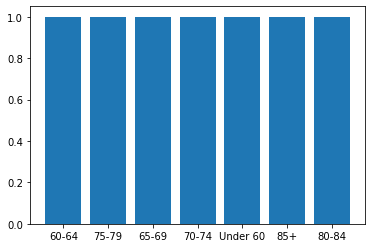

In [63]:
x = demographic['Age Category']
y = demographic['Age']
plt.bar(x=x, height=1)

In [69]:
test_df = pd.DataFrame(demographic['Age Category'].value_counts()).reset_index()

In [74]:
test_df

,index,Age Category
0,65-69,18282
1,60-64,17213
2,70-74,9759
3,75-79,5813
4,80-84,3344
5,85+,2831
6,Under 60,548


In [135]:
demographic.CallerNum.value_counts()

3212379    54
2441776    43
2758373    42
2431132    37
2416076    35
           ..
2768284     1
3232210     1
2391974     1
3084762     1
2796099     1
Name: CallerNum, Length: 10708, dtype: int64

<BarContainer object of 7 artists>

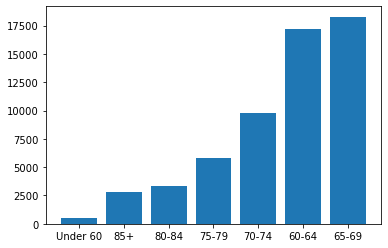

In [93]:

plt.bar(test_df['index'], test_df['Age Category'])

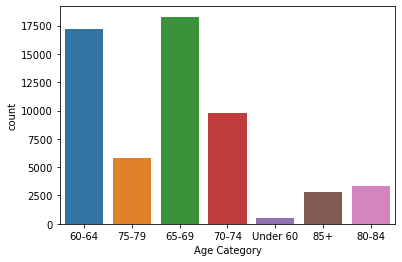

In [96]:

ax = sns.countplot(x="index", data=demographic)

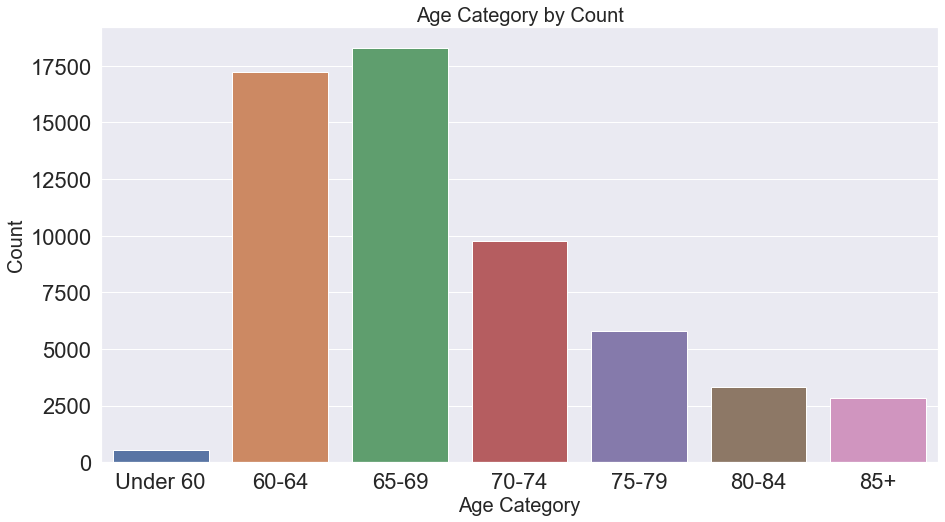

In [162]:
ax = sns.barplot(x="index", y="Age Category", data=test_df,
                 order=["Under 60", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"])
sns.set(font_scale = 2)
ax.set_ylabel("Count", fontsize=20)
ax.set_xlabel("Age Category", fontsize=20)
plt.title("Age Category by Count", fontsize=20)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [163]:
gender_plot = demographic[['CallerNum', 'demographics - Gender']]
gender_plot

,CallerNum,demographics - Gender
0,3638169,Female
1,4431194,Female
2,2941341,Male
3,3823933,Male
4,3348256,Female
...,...,...
57854,2384744,Female
57855,2385621,Female
57856,2631417,Female
57858,3239813,Male


In [164]:
gender_plot = gender_plot.drop_duplicates()
gender_plot

,CallerNum,demographics - Gender
0,3638169,Female
1,4431194,Female
2,2941341,Male
3,3823933,Male
4,3348256,Female
...,...,...
57828,2385088,Female
57831,2385054,Female
57834,2385074,Female
57843,2384932,Female


In [171]:
gender_plot = pd.DataFrame(gender_plot['demographics - Gender'].value_counts()).reset_index()

In [173]:
gender_plot

,index,demographics - Gender
0,Female,6783
1,Male,3823
2,Other,1
3,Transgender,1


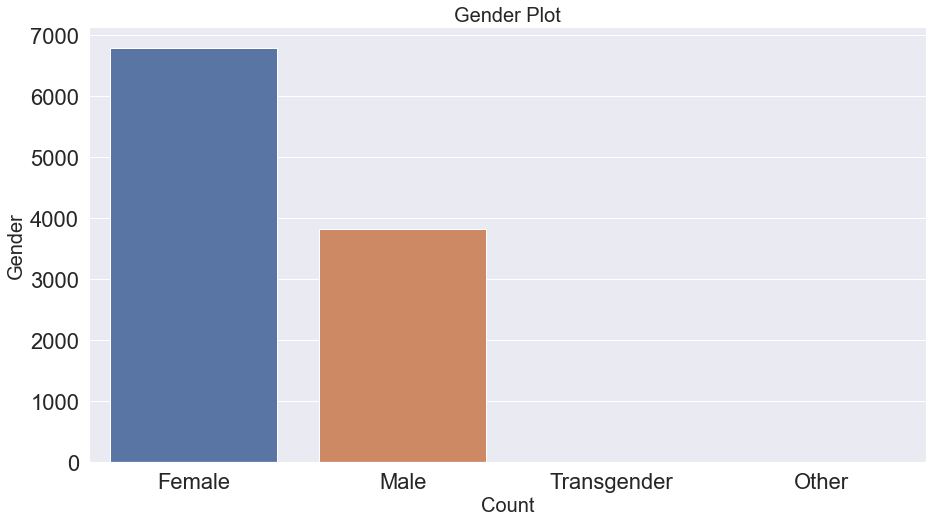

In [174]:
ax = sns.barplot(x="index", y="demographics - Gender", data=gender_plot,
                 order=["Female", "Male", "Transgender", "Other"])
sns.set(font_scale = 2)
ax.set_ylabel("Gender", fontsize=20)
ax.set_xlabel("Count", fontsize=20)
plt.title("Gender Plot", fontsize=20)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [175]:
race_plot = demographic[['CallerNum', 'demographics - Race/Ethnicity']]
race_plot

,CallerNum,demographics - Race/Ethnicity
0,3638169,African American
1,4431194,Caucasian
2,2941341,Asian
3,3823933,African American
4,3348256,African American
...,...,...
57854,2384744,Caucasian
57855,2385621,Caucasian
57856,2631417,Caucasian
57858,3239813,Caucasian


In [176]:
race_plot = race_plot.drop_duplicates()
race_plot

,CallerNum,demographics - Race/Ethnicity
0,3638169,African American
1,4431194,Caucasian
2,2941341,Asian
3,3823933,African American
4,3348256,African American
...,...,...
57827,2385100,Caucasian
57828,2385088,Caucasian
57831,2385054,Caucasian
57834,2385074,African American


In [178]:
race_plot = pd.DataFrame(race_plot['demographics - Race/Ethnicity'].value_counts()).reset_index()
race_plot

,index,demographics - Race/Ethnicity
0,Caucasian,5956
1,African American,2670
2,Hispanic,460
3,Asian,152
4,Unknown,115
5,American Indian and Alaska Native,52
6,Multi-racial,33
7,Pacific Islander,10


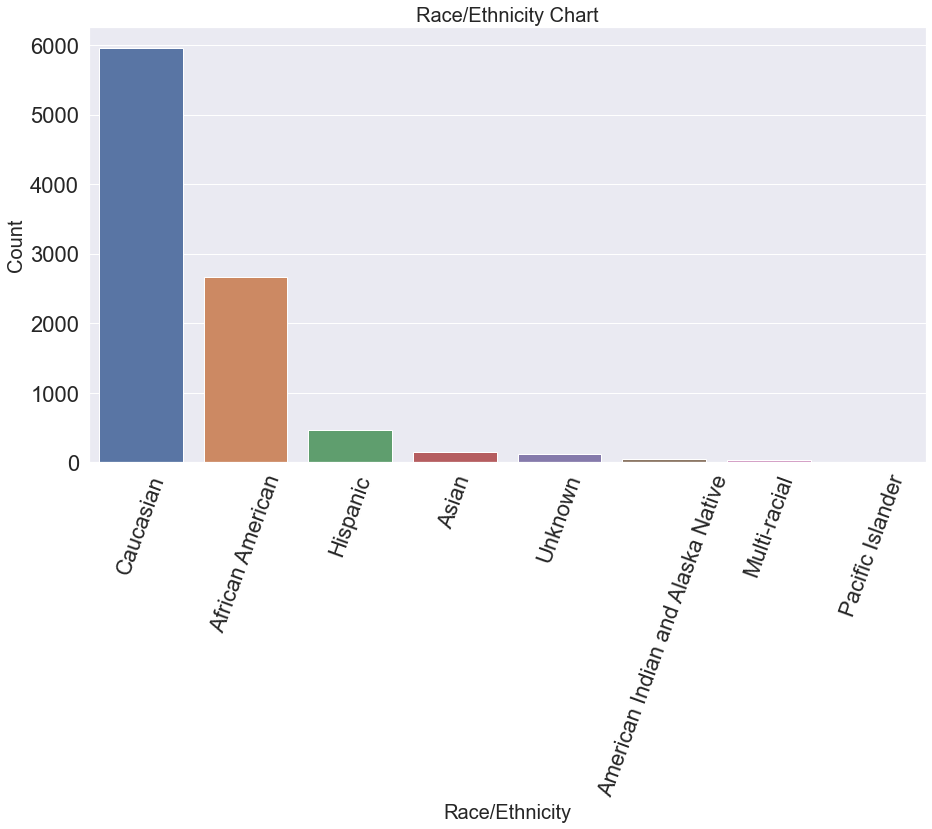

In [184]:
ax = sns.barplot(x="index", y="demographics - Race/Ethnicity", data=race_plot)
sns.set(font_scale = 2)
ax.set_ylabel("Count", fontsize=20)
ax.set_xlabel("Race/Ethnicity", fontsize=20)
plt.title("Race/Ethnicity Chart", fontsize=20)
plt.xticks(rotation=70)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [185]:
language_plot = demographic[['CallerNum', 'demographics - Preferred Language/Language Needed']]
language_plot

,CallerNum,demographics - Preferred Language/Language Needed
0,3638169,English
1,4431194,English
2,2941341,NaN
3,3823933,NaN
4,3348256,NaN
...,...,...
57854,2384744,NaN
57855,2385621,NaN
57856,2631417,NaN
57858,3239813,English


In [186]:
language_plot = language_plot.drop_duplicates()
language_plot

,CallerNum,demographics - Preferred Language/Language Needed
0,3638169,English
1,4431194,English
2,2941341,NaN
3,3823933,NaN
4,3348256,NaN
...,...,...
57827,2385100,NaN
57828,2385088,NaN
57831,2385054,NaN
57834,2385074,NaN


In [187]:
language_plot = pd.DataFrame(language_plot['demographics - Preferred Language/Language Needed'].value_counts()).reset_index()
language_plot

,index,demographics - Preferred Language/Language Needed
0,English,8411
1,Spanish,377
2,Other,120
3,Arabic,64


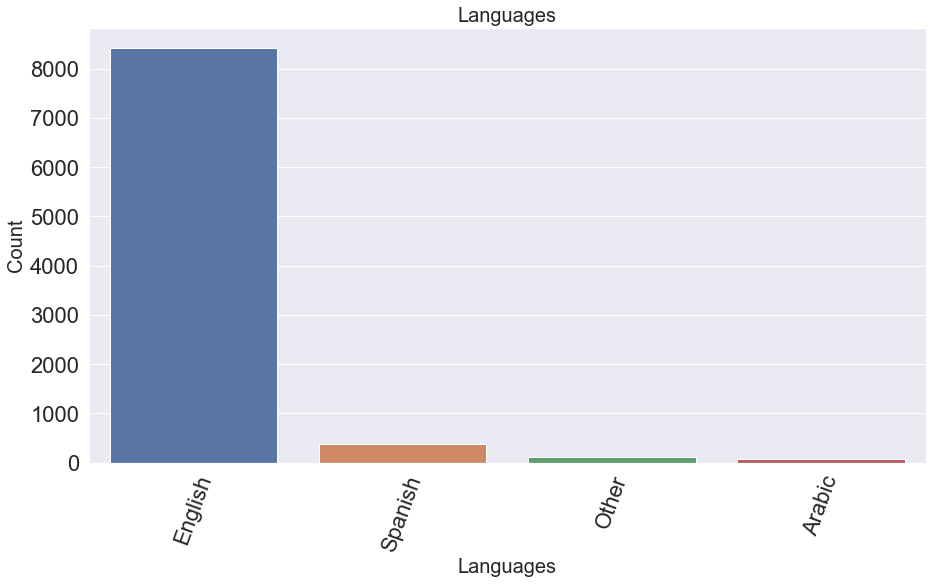

In [188]:
ax = sns.barplot(x="index", y="demographics - Preferred Language/Language Needed", data=language_plot)
sns.set(font_scale = 2)
ax.set_ylabel("Count", fontsize=20)
ax.set_xlabel("Languages", fontsize=20)
plt.title("Languages", fontsize=20)
plt.xticks(rotation=70)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [200]:
Smileon_df['Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [201]:
Smileon_df['Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].value_counts()

No     12260
Yes     9794
Name: Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free), dtype: int64

In [202]:
Smileon_df['Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)']

0        NaN
1        NaN
2         No
3         No
4         No
        ... 
57855    NaN
57856    Yes
57857    NaN
57858    NaN
57859    Yes
Name: Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free), Length: 57859, dtype: object